In [86]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd

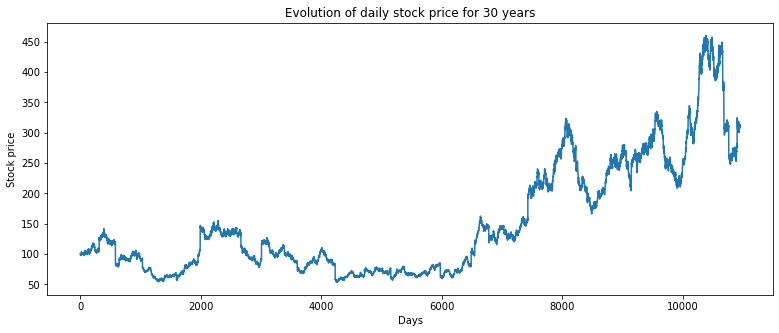

In [85]:
# test stock simulation

mu = 0.05
sigma = 0.2
years = 30
days = 365
N = years * days
dt = 1 / days
S0 = 100 # current stock price
lam = 1 # number of jumps per annum
m = 0 # mean of jump size
v = 0.15 #standard deviation of jump

#np.random.seed(0) # keep the same randomness each time

zt_stock = np.random.normal(0, np.sqrt(dt), size = N)  # randomness of the stock price
zt_jump = np.random.normal(m, v, size = N)  # randomness of the intensity and direction of the jump
nt = np.random.poisson(lam * dt, size = N)  # randomness of jump occurence

# simulation of merton jump diffusion model

price = S0 * np.exp(np.cumsum((mu-sigma**2/2) * dt + sigma * zt_stock)+ np.multiply(nt,zt_jump).cumsum(axis = 0) )

# plot

plt.plot(price)
plt.xlabel("Days")
plt.ylabel("Stock price")
plt.title("Evolution of daily stock price for 30 years")
fig = plt.gcf()
fig.set_size_inches(13,5)
plt.show()

In [99]:
def create_price (mu, sigma, years, S0, lam, m, v):
    days = 365
    N = years*days
    dt = 1/days
    
    zt_stock = np.random.normal(0, np.sqrt(dt), size = N)  # randomness of the stock price
    zt_jump = np.random.normal(m, v, size = N)  # randomness of the intensity and direction of the jump
    nt = np.random.poisson(lam * dt, size = N)  # randomness of jump occurence
    
    return S0 * np.exp(np.cumsum((mu-sigma**2/2) * dt + sigma * zt_stock)+ np.multiply(nt,zt_jump).cumsum(axis = 0) )
    

In [123]:
price_A = create_price(0.1,0.2,20, 100, 1,0,0.15)
price_B = create_price(0.1,0.2,20, 100, 1,0,0.15)
price_C = create_price(0.1,0.2,20, 100, 1,0,0.15)

In [229]:
d = {'stockA' : price_A , 'stockB' : price_B, 'stockC' : price_C}
df_price = pd.DataFrame(data = d)
df_daily_ret = df_price.pct_change(1).fillna(0)
df_daily_ret

,stockA,stockB,stockC
0,0.000000,0.000000,0.000000
1,0.007495,0.001898,-0.002475
2,-0.023696,0.003746,0.012315
3,-0.004994,0.019873,-0.012719
4,-0.002033,-0.003200,-0.005857
...,...,...,...
7295,-0.000620,-0.003557,-0.010736
7296,0.009290,-0.016912,0.002524
7297,0.018431,-0.003268,0.005681
7298,0.017741,0.015172,-0.004719


<AxesSubplot:>

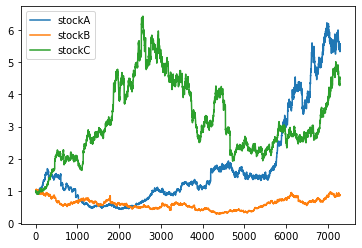

In [125]:
df_daily_ret_cum = (df_daily_ret+1).cumprod().dropna(how='all')
df_daily_ret_cum.plot()

In [144]:
print('stocks available :', list(df_price.columns) )

stocks available : ['stockA', 'stockB', 'stockC']


In [183]:
list_input = input('write the stocks separated by a space').split()
print(list_input)

write the stocks separated by a spacestockA 1000 stockB 2000
['stockA', '1000', 'stockB', '2000']


In [187]:
list_stocks = [ list_input[i] for i in range(0,len(list_input),2) ]
list_stocks

['stockA', 'stockB']

In [195]:
notional_stocks = np.array( [ int(list_input[i]) for i in range(1,len(list_input),2) ] )
notional_stocks

array([1000, 2000])

In [223]:
df_weight = pd.DataFrame(index = df_price.index, columns = list_stocks )
for i,item in enumerate(list_stocks):
    df_weight[item] = weight_stocks[i]

,stockA,stockB
0,0.333333,0.666667
1,0.333333,0.666667
2,0.333333,0.666667
3,0.333333,0.666667
4,0.333333,0.666667
...,...,...
7295,0.333333,0.666667
7296,0.333333,0.666667
7297,0.333333,0.666667
7298,0.333333,0.666667


,total_return,portfolio
0,0.000000,1.000000
1,0.003763,1.003763
2,-0.005401,0.998362
3,0.011584,1.009946
4,-0.002811,1.007135


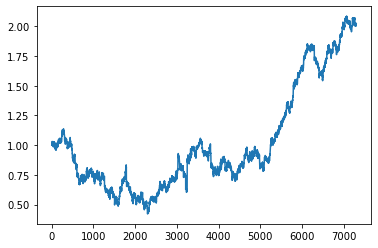

In [239]:
df_port = pd.DataFrame()
df_port['total_return'] = (df_daily_ret[list_stocks]*df_weight).sum(axis = 1)
df_port['portfolio'] = (df_port['total_return']).cumsum()+1
df_port['portfolio'].plot()
df_port.head(5)

In [240]:
tot_ret = 100*(df_port.portfolio.iloc[-1]-df_port.portfolio.iloc[0])/df_port.portfolio.iloc[0]
print('total return of the portfolio ', tot_ret , '%')

total return of the portfolio  102.49842580359724 %
